In [134]:
%reset

In [135]:
# needs to be done, napisat za to potom check when finished:

# check for importance new engine features, pokud ne tak drop, jinak nahradit NA

# drop rear-wheel drivetrain values [done]
# dummy transformation
# split into new and used
# split into cat and numeric features

# new cars mileage, age drop
# new cars: mpg_avg u-shape normalizace

# used cars: price normalization via IQR or z-score test
# used cars: drop cons_rev_number, mileage normalizace, mpg_ave 0.025 az 0.975 quntile, age 0.025 az 0.975 quntile

# new and used: price outlier treatment podle kategorie


In [136]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import datetime
import re
import warnings
warnings.filterwarnings('ignore')

In [137]:
current_dir = os.getcwd()

print(current_dir)

C:\Users\Max\Documents\GitHub\ukol1_tmp


In [138]:
# new_directory = '/home/jovyan/ukol1_tmp'
#
# # Change the current working directory
# os.chdir(new_directory)
#
# # Verify the current working directory has been changed
# current_dir = os.getcwd()
# print(current_dir)

In [139]:
# raw_data = pd.read_csv('honda_sell_data.csv', encoding='UTF-8')
raw_data = pd.read_csv('honda_sell_data.csv')
df = raw_data

In [140]:
# BRAINSTORM O VYBRANI Y PREMENNEJ
# well ocividne price je hned prva volba co bije do oci, s tym ze je jednoduche aj tym ze je spojita kvantitativna
# mozna consumer rating by sa dal, drivetrain, MPG a este dajme tomu mileage
# este dohodneme ale price je asi safe volba

In [141]:
df.head(10)

,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,...,VIN,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
0,1981,Honda,Prelude,Used,"$11,998",4.6,33,Silver,Red,Front-wheel Drive,...,JHMSN5223BC025755,13846,NaN,NaN,NaN,NaN,NaN,NaN,VT,Dealer
1,1987,Honda,Prelude,Used,"$39,998",4.3,216,Red,–,Front-wheel Drive,...,JHMBA3244HC007064,12824,NaN,NaN,NaN,NaN,NaN,NaN,UT,Dealer
2,1989,Honda,Prelude,Used,"$21,000",3.4,291,Blue,Blue,Front-wheel Drive,...,JHMBA4239KC055440,79755,4.3,4.7,4.6,4.9,5.0,4.7,NC,Dealer
3,1991,Honda,Civic,Used,"$14,998",4.6,33,Red,Gray,Front-wheel Drive,...,1HGED3655ML008180,57138,4.1,4.0,3.9,4.8,3.9,4.7,VT,Dealer
4,1992,Honda,Prelude,Used,"$18,900",4.7,0,White,Red,Front-wheel Drive,...,0000000BB11101577,86364,4.3,4.5,4.9,5.0,5.0,4.6,AR,Dealer
5,1993,Honda,del,Used,"$15,500",3.5,186,Blue Pearl,–,Front-wheel Drive,...,JHMEH6163PS801314,55526,4.2,4.4,4.4,4.9,4.6,5.0,NY,Dealer
6,1997,Honda,Prelude,Used,"$16,995",4.7,7,Black,Black,Front-wheel Drive,...,JHMBB6249VC002047,79423,4.1,4.2,4.9,4.9,4.8,4.9,CT,Dealer
7,1997,Honda,Accord,Used,"$11,994",4.6,20,Green,Gray,Front-wheel Drive,...,1HGCE1895VA007391,81424,4.5,4.4,4.4,4.8,4.3,4.8,NY,Dealer
8,1997,Honda,del,Used,"$16,800",4.4,0,WHITE,–,Front-wheel Drive,...,JHMEH6261VS005365,57284,4.1,4.0,4.4,4.7,4.6,4.8,IL,Dealer
9,1998,Honda,Prelude,Used,"$18,998",4.6,20,Silver,Black,Front-wheel Drive,...,JHMBB6147WC001708,28921,4.3,4.7,4.7,4.6,4.6,4.7,NE,Dealer


In [142]:
df.dtypes

Year                         int64
Make                        object
Model                       object
Condition                   object
Price                       object
Consumer_Rating            float64
Consumer_Review_#            int64
Exterior_Color              object
Interior_Color              object
Drivetrain                  object
MPG                         object
Fuel_Type                   object
Transmission                object
Engine                      object
VIN                         object
Mileage                     object
Comfort_Rating             float64
Interior_Design_Rating     float64
Performance_Rating         float64
Value_For_Money_Rating     float64
Exterior_Styling_Rating    float64
Reliability_Rating         float64
State                       object
Seller_Type                 object
dtype: object

In [143]:
# Label columns
def add_prefix(df_arg):
    for column in df_arg.columns:
        if df_arg[column].dtype == 'object':
            df_arg = df_arg.rename(columns={column: 'C_' + column})
        elif df_arg[column].dtype == 'float64' or df_arg[column].dtype == 'int64':
            df_arg = df_arg.rename(columns={column: 'N_' + column})
    return df_arg

df = add_prefix(df)

In [144]:
# Replace and count NAs in each column
df = df.replace({'–': pd.NA, np.nan: pd.NA})
print(df.isna().sum(axis=0))

N_Year                          0
C_Make                          0
C_Model                         0
C_Condition                     0
C_Price                         0
N_Consumer_Rating               0
N_Consumer_Review_#             0
C_Exterior_Color              118
C_Interior_Color              722
C_Drivetrain                   16
C_MPG                        1479
C_Fuel_Type                    11
C_Transmission                 37
C_Engine                       11
C_VIN                          11
C_Mileage                     292
N_Comfort_Rating              552
N_Interior_Design_Rating      552
N_Performance_Rating          552
N_Value_For_Money_Rating      552
N_Exterior_Styling_Rating     552
N_Reliability_Rating          552
C_State                        75
C_Seller_Type                  73
dtype: int64


In [145]:
# chybne formaty: price - object, mileage - object
df['C_Mileage'] = pd.to_numeric(df['C_Mileage'])
df = df.rename(columns={'C_Mileage': 'N_Mileage'})

In [146]:
# oprava Price
df = df[df["C_Price"] != "Not Priced"] # pripadne vyuzijeme na predict testing
df["C_Price"] = df["C_Price"].str.replace('$', '', regex=False)
df['C_Price'] = df['C_Price'].str.replace(',', '').astype(int)
df = df.rename(columns={'C_Price': 'N_Price'})

In [147]:
# New features
# Calculate the age of each car
current_year = datetime.datetime.now().year
df['N_Age'] = current_year - df['N_Year']

# Model by Year
df['C_Model_Year'] = df['C_Model'] + ' ' + df['N_Year'].astype(str)

In [148]:
# Split MPG into MPG low and MPG high
df[['MPG_low', 'MPG_high']] = df['C_MPG'].str.replace('–', '-').str.split('-', expand=True)

df['MPG_low'] = pd.to_numeric(df['MPG_low'])
df['MPG_high'] = pd.to_numeric(df['MPG_high'])
df['N_MPG_avg'] = df.apply(lambda x: (x['MPG_low'] + x['MPG_high']) / 2 if (x['MPG_low'] + x['MPG_high']) / 2 > 0 else pd.NA, axis=1)
df['N_MPG_avg'] = pd.to_numeric(df['N_MPG_avg'])

In [149]:
# Unique Model_Year and its MPG_avg
model_mpg = df[['C_Model_Year', 'N_MPG_avg']]
model_mpg = model_mpg.loc[model_mpg['N_MPG_avg'].notna()]
model_mpg = model_mpg.groupby('C_Model_Year')['N_MPG_avg'].mean().reset_index()

In [150]:
# Fill NAs with MPG_avg by Model_Year
test_mpg = df[df['N_MPG_avg'].isna()].copy()

for j in range(test_mpg.shape[0]):
    if pd.isna(test_mpg['N_MPG_avg'].iloc[j]):
        mdl_df = test_mpg['C_Model_Year'].iloc[j]
        for i in range(model_mpg.shape[0]):
            if model_mpg['C_Model_Year'].iloc[i] == mdl_df:
                test_mpg['N_MPG_avg'].iloc[j] = model_mpg['N_MPG_avg'].iloc[i]

df[df['N_MPG_avg'].isna()] = test_mpg

In [151]:
df.isna().sum(axis=0)
# MPG NAs 1479 -> 39

N_Year                          0
C_Make                          0
C_Model                         0
C_Condition                     0
N_Price                         0
N_Consumer_Rating               0
N_Consumer_Review_#             0
C_Exterior_Color              118
C_Interior_Color              719
C_Drivetrain                   16
C_MPG                        1456
C_Fuel_Type                    11
C_Transmission                 37
C_Engine                       11
C_VIN                          11
N_Mileage                     292
N_Comfort_Rating              540
N_Interior_Design_Rating      540
N_Performance_Rating          540
N_Value_For_Money_Rating      540
N_Exterior_Styling_Rating     540
N_Reliability_Rating          540
C_State                        75
C_Seller_Type                  73
N_Age                           0
C_Model_Year                    0
MPG_low                      1456
MPG_high                     1456
N_MPG_avg                      39
dtype: int64

In [152]:
df['N_MPG_avg'].value_counts()

22.500000    607
23.500000    552
34.214286    451
21.500000    449
32.000000    302
21.000000    294
22.000000    212
21.950000    189
32.586957    178
29.500000    122
42.500000    120
28.375000    111
31.000000    109
27.000000     99
34.000000     97
33.000000     79
23.000000     72
48.000000     67
33.500000     66
28.500000     59
30.000000     55
37.500000     54
35.500000     53
37.000000     52
52.000000     42
29.000000     40
25.000000     39
34.500000     30
30.500000     29
24.000000     25
31.500000     25
26.000000     23
36.500000     19
27.500000     17
35.000000     17
28.000000     16
36.000000     15
47.500000     14
20.500000     13
18.000000     12
26.500000     11
34.750000     11
24.500000      9
17.500000      8
19.000000      7
39.500000      6
25.500000      5
47.000000      5
44.000000      4
32.500000      4
31.982143      2
41.500000      2
20.000000      2
19.500000      2
14.000000      2
33.740385      1
45.500000      1
21.300000      1
29.703704     

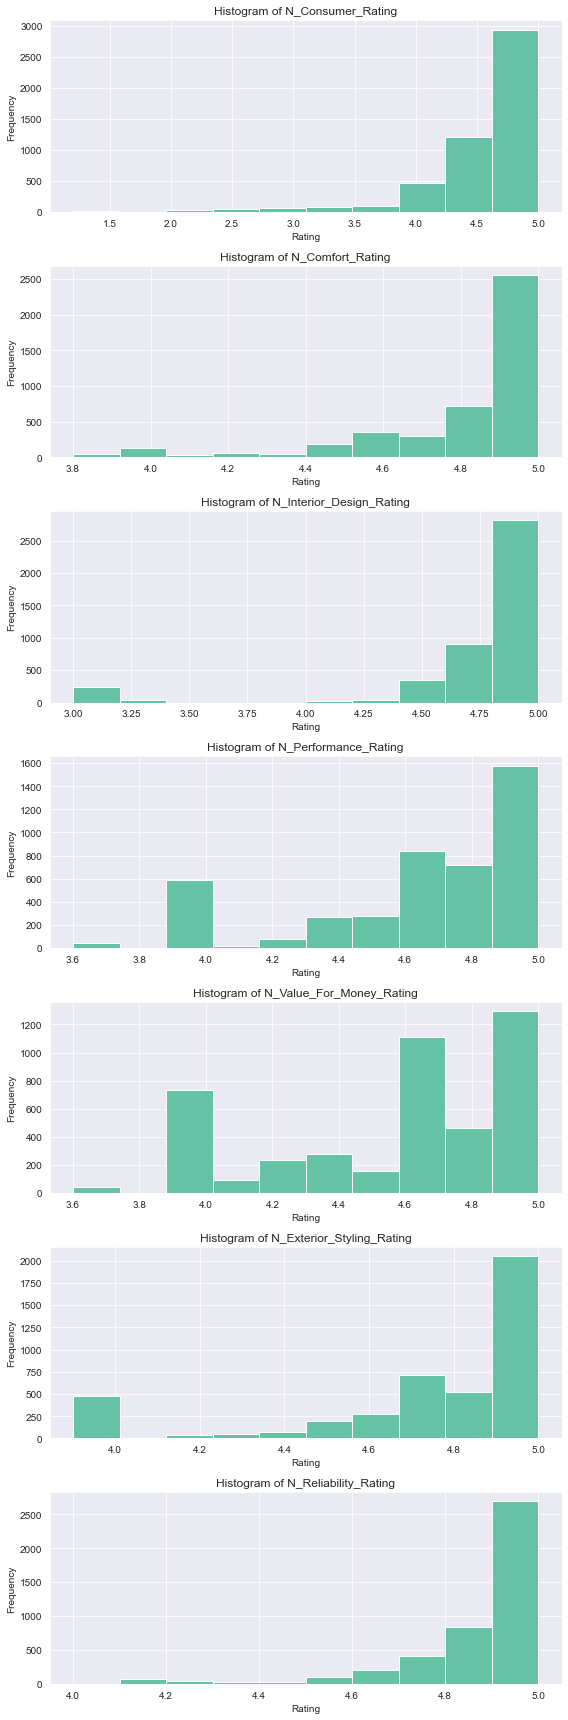

In [153]:
# Rating distribution
rating_features = ['N_Consumer_Rating', 'N_Comfort_Rating', 'N_Interior_Design_Rating', 'N_Performance_Rating',
                   'N_Value_For_Money_Rating', 'N_Exterior_Styling_Rating', 'N_Reliability_Rating']

fig, axes = plt.subplots(nrows=len(rating_features), ncols=1, figsize=(8, 24))

for i, feature in enumerate(rating_features):
    df[feature].dropna().hist(ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [154]:
# Rating categorize
for feature in rating_features:
    for j in range(df.shape[0]):
        rating = df[feature].iloc[j]
        if pd.isna(rating):
            # NA as category
            df[feature].iloc[j] = 'NA'
        elif rating < 3:
            df[feature].iloc[j] = 'Poor'
        elif rating < 4.5:
            df[feature].iloc[j] = 'Fair'
        else:
            df[feature].iloc[j] = 'Excellent'

    df = df.rename(columns={feature: f'C_{feature[2:]}'})

In [155]:
df['C_Comfort_Rating'].value_counts()

Excellent    4044
NA            540
Fair          370
Name: C_Comfort_Rating, dtype: int64

In [156]:
# Categorize Drivetrain
df = df.replace({'Four-wheel Drive': 'AWD',
                 'All-wheel Drive': 'AWD',
                 'Front-wheel Drive': 'FWD',
                 'Rear-wheel Drive': 'RWD'
                 })

df['C_Drivetrain'].value_counts()

FWD    2478
AWD    2447
RWD      13
Name: C_Drivetrain, dtype: int64

In [157]:
df['C_Model'].str.lower().value_counts()

pilot        1095
cr-v          819
accord        701
civic         615
odyssey       470
passport      425
ridgeline     382
hr-v          229
insight        85
clarity        30
fit            30
element        18
cr-z           16
crosstour      15
s2000          13
prelude         9
del             2
Name: C_Model, dtype: int64

In [158]:
# Categorize model
model_top_7 = df['C_Model'].str.lower().value_counts().index.values[:7] # Top 7 by value_counts

for j in range(df.shape[0]):
    model = df['C_Model'].str.lower().iloc[j]
    if model not in model_top_7:
        df['C_Model'].iloc[j] = 'other'
    else:
        df['C_Model'].iloc[j] = model

In [159]:
df['C_Model'].value_counts()

pilot        1095
cr-v          819
accord        701
civic         615
odyssey       470
other         447
passport      425
ridgeline     382
Name: C_Model, dtype: int64

In [160]:
df['C_Exterior_Color'].str.lower().value_counts()

platinum white pearl                                  880
crystal black pearl                                   567
lunar silver metallic                                 345
sonic gray pearl                                      327
modern steel metallic                                 283
gray                                                  256
white                                                 243
black                                                 234
silver                                                130
still night pearl                                     113
blue                                                  108
obsidian blue pearl                                   105
radiant red metallic                                   78
radiant red metallic ii                                74
platinum white                                         69
red                                                    65
white diamond pearl                                    60
meteorite gray

In [161]:
# Categorize Exterior_Color
ext_colors = ['silver', 'black', 'white', 'gray', 'blue']

for j in range(df.shape[0]):
    row = df['C_Exterior_Color'].str.lower().iloc[j]
    if pd.isna(row):
        continue
    for color in ext_colors:
        if color in row:
            df['C_Exterior_Color'].iloc[j] = color
            break
        else:
            df['C_Exterior_Color'].iloc[j] = 'other'


In [162]:
df['C_Exterior_Color'].value_counts()

white     1301
other     1094
black      858
gray       704
silver     555
blue       324
Name: C_Exterior_Color, dtype: int64

In [163]:
df['C_Interior_Color'].str.lower().value_counts()

black                           2862
gray                             787
beige                            214
ivory                             79
black / red                       69
mocha                             50
tan                               18
red / black                       17
black/red                         16
blk lth                           13
red                               10
black / gray                      10
nh-883p/black                      8
truffle                            6
black / ivory                      6
grey                               5
brown                              5
gray / blue                        4
blue                               4
blk fabric w/synthetic lt          3
parchment                          3
nh-912p/black                      2
nh-797m/black                      2
nh-731p/black                      2
nh-877p/black                      2
sport                              2
graphite                           2
s

In [164]:
# Categorize Interior_Color
black_keywords = {"black": ["black", "blk"]}
gray_keywords = {"gray": ["gray", "grey", "gry"]}
beige_keywords = {"beige": ["beige", "biege", "bge"]}
colors = [black_keywords, gray_keywords, beige_keywords]

def categorize_int_color(clr):
    clr = clr.lower()
    for color_dict in colors:
        for category, keywords in color_dict.items():
            if any(keyword in clr for keyword in keywords):
                return category
    return "other"

df['C_Interior_Color'] = df['C_Interior_Color'].apply(lambda x: categorize_int_color(x) if not pd.isna(x) else x)

In [165]:
df['C_Interior_Color'].value_counts()

black    3028
gray      801
beige     216
other     190
Name: C_Interior_Color, dtype: int64

In [166]:
df["C_Engine"].str.lower().value_counts()

3.5l v6 24v gdi sohc                                                1879
1.5l i4 16v gdi dohc turbo                                           922
2.0l i4 16v gdi dohc                                                 208
2.0l i4 16v gdi dohc hybrid                                          205
2.0l i4 16v mpfi dohc hybrid                                         187
3.5l v6 24v gdi dohc                                                 185
4 cylinder engine                                                    148
1.8l i4 16v mpfi sohc                                                147
3.5l v6 24v mpfi sohc                                                142
2.0l i4 16v gdi dohc turbo                                           117
v6 cylinder engine                                                   109
2.0l i4 16v mpfi dohc                                                104
1.5l i4 16v mpfi dohc hybrid                                         103
2.4l i4 16v mpfi dohc                              

In [167]:
# Engine feature engineering using regex
def extract_engine_features(engine_string):
    if not isinstance(engine_string, str):
        return {
            'N_Litr': pd.NA,
            'N_Cylinders': pd.NA,
            'N_Valves': pd.NA,
            'C_Fuel_injection': pd.NA,
            'C_Camshaft': pd.NA
        }

    features = {}

    # Extract engine displacement (liters)
    litr = re.search(r"(\d+\.\d+)\s?l?", engine_string, re.IGNORECASE)
    if litr:
        features["N_Litr"] = float(litr.group(1))

    # Extract cylinders
    cylinders = re.search(r"([vi]-?\d+|\d+\s*cylinder)", engine_string, re.IGNORECASE)
    if cylinders:
        num_cylinders = re.search(r"\d+", cylinders.group(1))
        if num_cylinders:
            features["N_Cylinders"] = int(num_cylinders.group(0))
        else:
            features["N_Cylinders"] = int(cylinders.group(1).upper())

    # Extract valves
    valves = re.search(r"(\d+v|\d+-valve)", engine_string, re.IGNORECASE)
    if valves:
        num_valves = re.search(r"\d+", valves.group(1))
        if num_valves:
            features["N_Valves"] = int(num_valves.group(0))

    # Extract fuel injection
    fuel_injection = re.search(r"(mpfi|gdi)", engine_string, re.IGNORECASE)
    if fuel_injection:
        features["C_Fuel_injection"] = fuel_injection.group(1).upper()

    # Extract camshaft
    camshaft = re.search(r"(sohc|dohc)", engine_string, re.IGNORECASE)
    if camshaft:
        features["C_Camshaft"] = camshaft.group(1).upper()

    return features


# Function to extract features and create new columns
def extract_and_add_features(row):
    features = extract_engine_features(row['C_Engine'])

    for feature, value in features.items():
        row[feature] = value

    return row

# Define the columns to be added
new_columns = ['N_Litr', 'N_Cylinders', 'N_Valves', 'C_Fuel_injection', 'C_Camshaft']

# Insert new columns into the DataFrame with default value as None
for new_col in new_columns:
    df.insert(df.columns.get_loc("C_Engine") + 1, new_col, None)

# Apply the function to each row in the DataFrame
df = df.apply(extract_and_add_features, axis=1)
df[['C_Model', 'C_Engine', 'N_Litr', 'N_Cylinders', 'N_Valves', 'C_Fuel_injection', 'C_Camshaft']].head()

,C_Model,C_Engine,N_Litr,N_Cylinders,N_Valves,C_Fuel_injection,C_Camshaft
0,other,1.8L I4 12V 3 BBL SOHC,1.8,4,12,None,SOHC
1,other,2.0L I4 12V SOHC,2.0,4,12,None,SOHC
2,other,2.0L I4 16V DOHC,2.0,4,16,None,DOHC
3,civic,1.5L I4 16V SOHC,1.5,4,16,None,SOHC
4,other,2.2 H22A,2.2,None,None,None,None


In [168]:
df['N_Valves'].value_counts()

16    2256
24    2211
8       10
12       2
Name: N_Valves, dtype: int64

In [169]:
# Categorize Valves
def categorize_valves(engine_valves):
    if not pd.isna(engine_valves):
        return f"{int(engine_valves)}-valves"
    else:
        return pd.NA

df["C_Valves"] = df["N_Valves"].apply(categorize_valves)
df["C_Valves"].value_counts()

16-valves    2256
24-valves    2211
8-valves       10
12-valves       2
Name: C_Valves, dtype: int64

In [170]:
df = df.drop(df[df['C_Valves'] == '8-valves'].index)
df = df.drop(df[df['C_Valves'] == '12-valves'].index)

In [171]:
df["N_Cylinders"].value_counts()

4    2528
6    2399
Name: N_Cylinders, dtype: int64

In [172]:
# Categorize Cylinders
def categorize_cylinders(engine_cylinders):
    if not pd.isna(engine_cylinders):
        return f"{int(engine_cylinders)}-cylinders"
    else:
        return pd.NA

df["C_Cylinders"] = df["N_Cylinders"].apply(categorize_cylinders)
df["C_Cylinders"].value_counts()

4-cylinders    2528
6-cylinders    2399
Name: C_Cylinders, dtype: int64

In [173]:
# Categorize litr
def categorize_litr(engine_size):
    if not pd.isna(engine_size):
        if 0.5 <= engine_size < 2:
            return "small"
        elif 2.0 <= engine_size < 3.0:
            return "midsize"
        elif engine_size >= 3.0:
            return "large"
        else:
            return "other"
    else:
        return pd.NA

df["C_Litr"] = df["N_Litr"].apply(categorize_litr)
df["C_Litr"].value_counts()

large      2291
small      1302
midsize    1081
Name: C_Litr, dtype: int64

In [174]:
test_check = df[['C_Model', 'C_Engine', 'N_Litr', 'N_Cylinders', 'N_Valves', 'C_Fuel_injection', 'C_Camshaft']]
test_check.isna().sum(axis=0)

C_Model               0
C_Engine             11
N_Litr              268
N_Cylinders          15
N_Valves            475
C_Fuel_injection    502
C_Camshaft          473
dtype: int64

In [175]:
rows_with_na = test_check[test_check.isna().any(axis=1)]

In [176]:
df['C_Transmission'].str.lower().value_counts()

automatic cvt                            1806
9-speed automatic                        1298
automatic                                 410
10-speed automatic                        410
6-speed automatic                         231
5-speed automatic                         198
6-speed manual                            162
variable                                   87
manual                                     32
9-speed a/t                                30
continuously variable w/sport mode         27
cvt                                        20
continuously variable                      17
electronic continuously variable           17
4-speed automatic                          16
10-speed a/t                               13
continuously variable (m cvt)              12
5-speed manual                             12
5-speed a/t                                10
6-speed a/t                                10
1-speed cvt with overdrive                  9
continuously variable automatic   

In [177]:
# Categorize transmission
def categorize_transmission(transmission):
    transmission = str(transmission).lower()

    if re.search(r"cvt|variable|continuously|ecvt", transmission):
        return "CVT"
    elif re.search(r"automatic|a/t|auto", transmission):
        return "Automatic"
    elif re.search(r"manual|m/t", transmission):
        return "Manual"
    else:
        return pd.NA

df["C_Transmission"] = df["C_Transmission"].apply(categorize_transmission)
df["C_Transmission"].value_counts()

Automatic    2653
CVT          2026
Manual        212
Name: C_Transmission, dtype: int64

In [178]:
df['C_State'].str.lower().value_counts()

il    329
fl    322
ca    321
tx    292
oh    265
ny    196
in    194
nc    181
va    160
nj    151
ga    146
mn    143
mo    132
pa    130
wa    129
tn    126
ma    121
md    118
wi    104
ia    100
la     97
ky     93
mi     92
ct     87
co     82
az     80
ks     70
ok     68
ne     65
al     61
or     58
ar     57
sc     41
nv     37
wv     29
ut     23
nd     19
id     19
nh     18
me     17
sd     17
vt     15
nm     13
de     12
mt     10
ms      9
ak      7
wy      6
hi      3
ri      2
Name: C_State, dtype: int64

In [179]:
# Define the region groups
west = ['CA', 'WA', 'OR', 'NV', 'AZ', 'UT', 'ID', 'MT', 'WY', 'CO', 'NM', 'AK', 'HI']
midwest = ['IL', 'OH', 'IN', 'MN', 'WI', 'IA', 'MO', 'MI', 'KS', 'NE', 'ND', 'SD']
south = ['TX', 'FL', 'NC', 'VA', 'LA', 'TN', 'OK', 'KY', 'AL', 'SC', 'MS', 'AR', 'GA']
northeast = ['NY', 'NJ', 'PA', 'MA', 'MD', 'CT', 'RI', 'NH', 'VT', 'ME', 'DE', 'WV']

# Add a new column to the data frame with the region for each state
df['C_Region'] = df['C_State'].fillna('NA').apply(lambda x: 'West' if x in west else
('Midwest' if x in midwest else
 ('South' if x in south else
  ('Northeast' if x in northeast else x))))

In [180]:
df['C_Region'].str.lower().value_counts()

south        1653
midwest      1530
northeast     896
west          788
na             75
Name: C_Region, dtype: int64

In [181]:
# looking at graphs via sweetviz
# %time
# import sweetviz as sv
# report = sv.analyze(source=[df, "Raw data"],
#             target_feat = 'Price',
#             pairwise_analysis = 'on')

In [182]:
# report.show_html('report.html')
# from IPython.display import IFrame
# IFrame('./report.html', width=1000, height=400)

In [183]:
# dame prec make - iba honda, seller type - 99% je dealer , Vin - seriove cislo auta unique pre kazde auto
# Drop columns
df = df.drop(["C_Make", "C_Seller_Type", "C_VIN", "C_Model_Year", "N_Year", "C_Engine", "N_Litr", "N_Cylinders", "N_Valves","C_MPG", 'MPG_low', 'MPG_high', 'C_State'], axis=1)

In [184]:
df.isna().sum(axis=0)

C_Model                        0
C_Condition                    0
N_Price                        0
C_Consumer_Rating              0
N_Consumer_Review_#            0
C_Exterior_Color             118
C_Interior_Color             718
C_Drivetrain                  16
C_Fuel_Type                   11
C_Transmission                51
C_Camshaft                   473
C_Fuel_injection             502
N_Mileage                    292
C_Comfort_Rating               0
C_Interior_Design_Rating       0
C_Performance_Rating           0
C_Value_For_Money_Rating       0
C_Exterior_Styling_Rating      0
C_Reliability_Rating           0
N_Age                          0
N_MPG_avg                     37
C_Valves                     475
C_Cylinders                   15
C_Litr                       268
C_Region                       0
dtype: int64

In [185]:
display(df['C_Fuel_Type'].value_counts())
df = df.drop(df[df['C_Fuel_Type'] == 'Compressed Natural Gas'].index)

Gasoline                  4353
Hybrid                     577
Compressed Natural Gas       1
Name: C_Fuel_Type, dtype: int64

In [186]:
display(df['C_Drivetrain'].value_counts())
df = df.drop(df[df['C_Drivetrain'] == 'RWD'].index)

FWD    2465
AWD    2447
RWD      13
Name: C_Drivetrain, dtype: int64

In [187]:
df = df.reset_index(drop=True)

In [188]:
df['C_Condition'].value_counts()

New                2658
Used               1990
Honda Certified     280
Name: C_Condition, dtype: int64

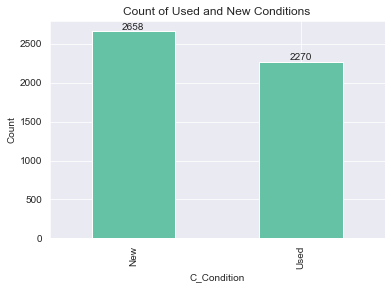

New     2658
Used    2270
Name: C_Condition, dtype: int64

In [189]:
# Used/New distribution

# replacement of honda certified as used (according to Cars.com info)
df['C_Condition'] = df['C_Condition'].replace('Honda Certified', 'Used')

counts = df['C_Condition'].value_counts()
ax = counts.plot.bar()

for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

ax.set_title('Count of Used and New Conditions')
ax.set_xlabel('C_Condition')
ax.set_ylabel('Count')

plt.show()

df['C_Condition'].value_counts()

In [190]:
# Split df by C_Condition
df_new = df[df['C_Condition'] == 'New']
df_used = df[df['C_Condition'] == 'Used']

In [191]:
df_new.isna().sum(axis=0)

C_Model                        0
C_Condition                    0
N_Price                        0
C_Consumer_Rating              0
N_Consumer_Review_#            0
C_Exterior_Color              44
C_Interior_Color             313
C_Drivetrain                  11
C_Fuel_Type                    7
C_Transmission                47
C_Camshaft                   275
C_Fuel_injection             298
N_Mileage                    288
C_Comfort_Rating               0
C_Interior_Design_Rating       0
C_Performance_Rating           0
C_Value_For_Money_Rating       0
C_Exterior_Styling_Rating      0
C_Reliability_Rating           0
N_Age                          0
N_MPG_avg                      0
C_Valves                     277
C_Cylinders                    9
C_Litr                       136
C_Region                       0
dtype: int64

In [192]:
df_used.isna().sum(axis=0)

C_Model                        0
C_Condition                    0
N_Price                        0
C_Consumer_Rating              0
N_Consumer_Review_#            0
C_Exterior_Color              72
C_Interior_Color             402
C_Drivetrain                   5
C_Fuel_Type                    4
C_Transmission                 4
C_Camshaft                   197
C_Fuel_injection             203
N_Mileage                      4
C_Comfort_Rating               0
C_Interior_Design_Rating       0
C_Performance_Rating           0
C_Value_For_Money_Rating       0
C_Exterior_Styling_Rating      0
C_Reliability_Rating           0
N_Age                          0
N_MPG_avg                     37
C_Valves                     197
C_Cylinders                    6
C_Litr                       132
C_Region                       0
dtype: int64

In [193]:
df_new = df_new.dropna()
df_used = df_used.dropna()

In [194]:
# Split into features and target
features_new = df_new.drop(['N_Price'], axis=1)
target_new = df_new['N_Price']

features_used = df_used.drop(['N_Price'], axis=1)
target_used = df_used['N_Price']

In [195]:
target_new = target_new.to_frame()
target_used = target_used.to_frame()

In [196]:
features_new.dtypes

C_Model                       object
C_Condition                   object
C_Consumer_Rating             object
N_Consumer_Review_#            int64
C_Exterior_Color              object
C_Interior_Color              object
C_Drivetrain                  object
C_Fuel_Type                   object
C_Transmission                object
C_Camshaft                    object
C_Fuel_injection              object
N_Mileage                    float64
C_Comfort_Rating              object
C_Interior_Design_Rating      object
C_Performance_Rating          object
C_Value_For_Money_Rating      object
C_Exterior_Styling_Rating     object
C_Reliability_Rating          object
N_Age                          int64
N_MPG_avg                    float64
C_Valves                      object
C_Cylinders                   object
C_Litr                        object
C_Region                      object
dtype: object

In [197]:
features_used.dtypes

C_Model                       object
C_Condition                   object
C_Consumer_Rating             object
N_Consumer_Review_#            int64
C_Exterior_Color              object
C_Interior_Color              object
C_Drivetrain                  object
C_Fuel_Type                   object
C_Transmission                object
C_Camshaft                    object
C_Fuel_injection              object
N_Mileage                    float64
C_Comfort_Rating              object
C_Interior_Design_Rating      object
C_Performance_Rating          object
C_Value_For_Money_Rating      object
C_Exterior_Styling_Rating     object
C_Reliability_Rating          object
N_Age                          int64
N_MPG_avg                    float64
C_Valves                      object
C_Cylinders                   object
C_Litr                        object
C_Region                      object
dtype: object

In [198]:
# Split features into cat and num
categorical_features_new = features_new.select_dtypes(include=['object'])
categorical_features_used = features_used.select_dtypes(include=['object'])

numerical_features_new = features_new.select_dtypes(include=['int64', 'float64'])
numerical_features_used = features_used.select_dtypes(include=['int64', 'float64'])

In [199]:
# Reset index
categorical_features_used.reset_index(drop=True)
categorical_features_new.reset_index(drop=True)
numerical_features_used.reset_index(drop=True)
numerical_features_new.reset_index(drop=True)

,N_Consumer_Review_#,N_Mileage,N_Age,N_MPG_avg
0,3094,11000.0,2,31.0
1,234,3.0,2,22.5
2,321,10.0,1,35.0
3,7,7.0,1,35.0
4,1732,5.0,1,34.5
...,...,...,...,...
1755,1780,4.0,0,21.0
1756,29,3.0,0,23.5
1757,1780,5.0,0,21.5
1758,3543,110.0,0,23.5


In [200]:
# Numerical features checking
numerical_features_new.describe()

,N_Consumer_Review_#,N_Mileage,N_Age,N_MPG_avg
count,1760.000000,1760.000000,1760.000000,1760.000000
mean,1425.721591,120.121023,0.448864,27.284192
std,1530.661120,841.396265,0.499800,6.000928
min,0.000000,0.000000,0.000000,21.000000
25%,272.250000,3.000000,0.000000,22.000000
50%,884.500000,5.000000,0.000000,23.500000
75%,1978.000000,10.000000,1.000000,32.586957
max,13041.000000,13110.000000,2.000000,42.500000


In [201]:
# numerical_features_new = numerical_features_new.drop('N_Consumer_Review_#', axis=1)

In [202]:
numerical_features_used.describe()

,N_Consumer_Review_#,N_Mileage,N_Age,N_MPG_avg
count,1707.000000,1707.000000,1707.000000,1707.000000
mean,1292.648506,48491.533685,4.605741,28.368787
std,2510.281316,38365.988073,3.747736,7.503136
min,0.000000,298.000000,0.000000,17.500000
25%,69.500000,20749.500000,2.000000,22.500000
50%,416.000000,37871.000000,4.000000,26.000000
75%,1331.000000,66321.000000,6.000000,33.000000
max,29258.000000,259029.000000,26.000000,52.000000


In [203]:
# Categorical features checking new cars
pd.set_option('display.max_rows', 500)

pivot_data = categorical_features_new.agg(['nunique']).T
pivot_data['over_8'] = np.where(pivot_data['nunique'] > 8, 1, 0).astype(int)

dict = {}
for x in categorical_features_new.columns:
    value_count = categorical_features_new[x].value_counts()
    value_count = value_count/categorical_features_new[x].count()
    dict[x] = value_count.where(lambda x : x < 0.05).count()
    
result = pd.merge(pivot_data, pd.Series(dict, name='under_5_perc'), left_index=True, right_index=True)
result['flag'] = np.where((result['over_8'] > 0) | (result['under_5_perc'] > 0), 1, 0)
display(result)

,nunique,over_8,under_5_perc,flag
C_Model,8,0,0,0
C_Condition,1,0,0,0
C_Consumer_Rating,3,0,1,1
C_Exterior_Color,6,0,1,1
C_Interior_Color,4,0,2,1
C_Drivetrain,2,0,0,0
C_Fuel_Type,2,0,0,0
C_Transmission,3,0,1,1
C_Camshaft,2,0,0,0
C_Fuel_injection,2,0,1,1


In [204]:
# Categorical features checking used cars
pd.set_option('display.max_rows', 500)

pivot_data = categorical_features_used.agg(['nunique']).T
pivot_data['over_8'] = np.where(pivot_data['nunique'] > 8, 1, 0).astype(int)

dict = {}
for x in categorical_features_used.columns:
    value_count = categorical_features_used[x].value_counts()
    value_count = value_count/categorical_features_used[x].count()
    dict[x] = value_count.where(lambda x : x < 0.05).count()
    
result = pd.merge(pivot_data, pd.Series(dict, name='under_5_perc'), left_index=True, right_index=True)
result['flag'] = np.where((result['over_8'] > 0) | (result['under_5_perc'] > 0), 1, 0)
display(result)

,nunique,over_8,under_5_perc,flag
C_Model,8,0,0,0
C_Condition,1,0,0,0
C_Consumer_Rating,3,0,1,1
C_Exterior_Color,6,0,0,0
C_Interior_Color,4,0,0,0
C_Drivetrain,2,0,0,0
C_Fuel_Type,2,0,0,0
C_Transmission,3,0,0,0
C_Camshaft,2,0,0,0
C_Fuel_injection,2,0,0,0


### Charts: New Cars

In [205]:
# Charts
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

clr = "#c2c1f2"
pltt = "Set2"
sns.set_palette(pltt)
plt.rcParams.update({'figure.max_open_warning': 0})

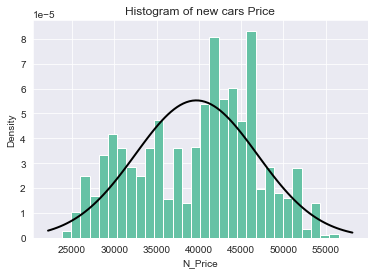

In [206]:
#histogram Price_new
df_new['N_Price'].hist(bins=30, density=True)

# Set the title and labels for the plot
plt.title('Histogram of new cars Price')
plt.xlabel('N_Price')
plt.ylabel('Density')

# Compute the mean and standard deviation of the 'Price' column
mu, std = norm.fit(df_new['N_Price'])

# Create a range of values for the x-axis
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Overlay a normal probability density function (PDF) on the histogram
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Display the plot
plt.show()

In [207]:
for feature in numerical_features_new.columns:
    # Count the NaN values in the feature
    num_nan = numerical_features_new[feature].isna().sum()
    
    # Display the feature name and number of NaN values
    print(f"Feature: {feature}, NA Count: {num_nan}")

Feature: N_Consumer_Review_#, NA Count: 0
Feature: N_Mileage, NA Count: 0
Feature: N_Age, NA Count: 0
Feature: N_MPG_avg, NA Count: 0


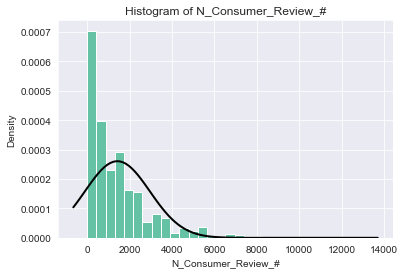

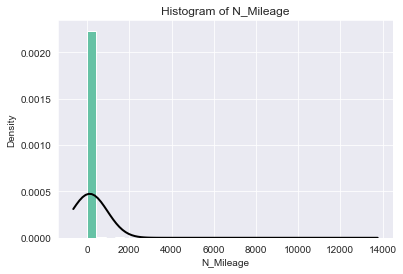

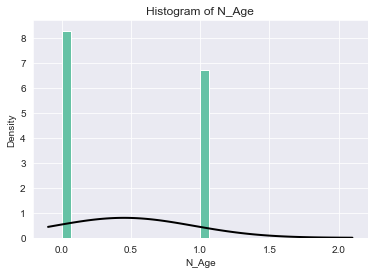

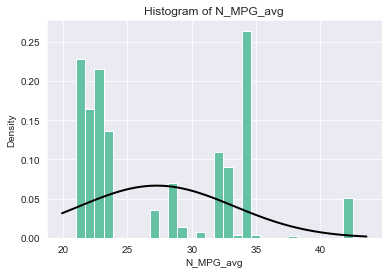

In [208]:
for feature in numerical_features_new.columns:
    # Plot histogram
    numerical_features_new[feature].hist(bins=30, density=True)
    
    # Set the title and labels for the plot
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    
    # Compute the mean and standard deviation of the feature
    mu, std = norm.fit(numerical_features_new[feature].dropna())
    
    # Create a range of values for the x-axis
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    
    # Overlay a normal probability density function (PDF) on the histogram
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    
    # Display the plot
    plt.show()

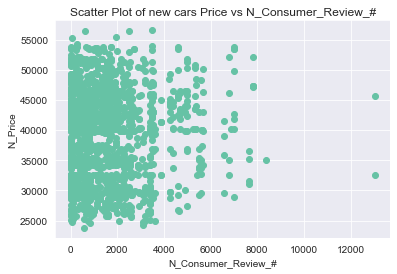

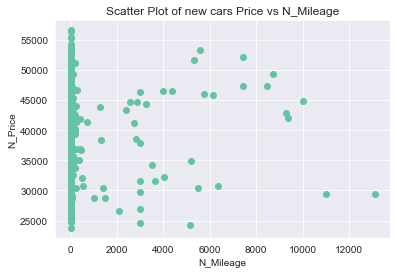

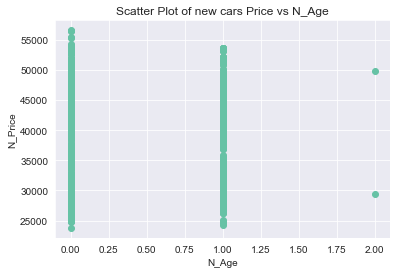

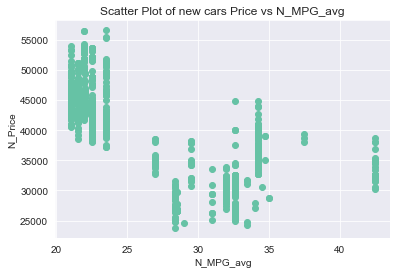

In [209]:
#Scatter ploty pre numerical features, new cars
def plot_scatter(target, num_df):
    # Get the numerical columns of the DataFrame
    num_cols = num_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Create a scatter plot for each numerical column
    for col in num_cols:
        plt.scatter(num_df[col], target)
        plt.title(f'Scatter Plot of new cars Price vs {col}')
        plt.xlabel(col)
        plt.ylabel('N_Price')
        plt.show()


plot_scatter(target_new['N_Price'], numerical_features_new)

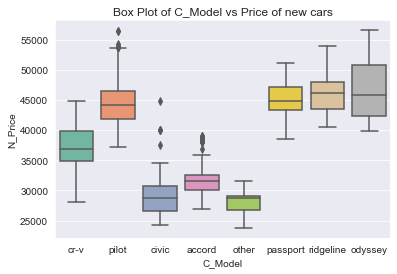

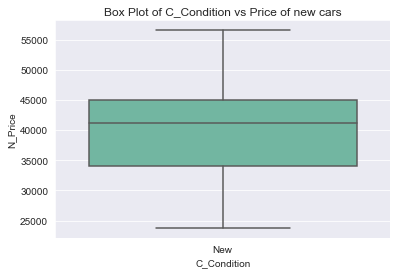

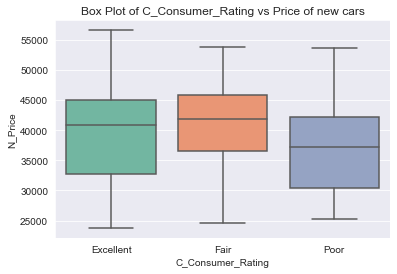

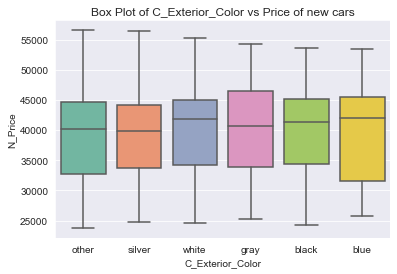

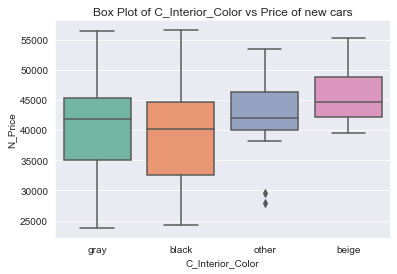

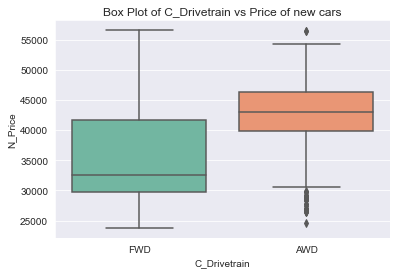

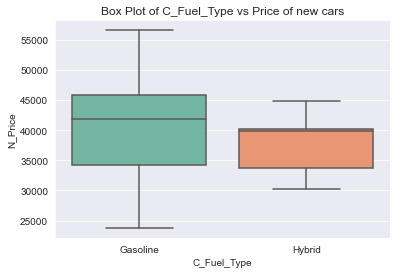

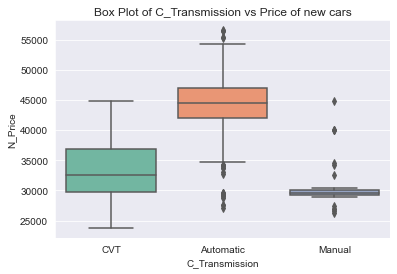

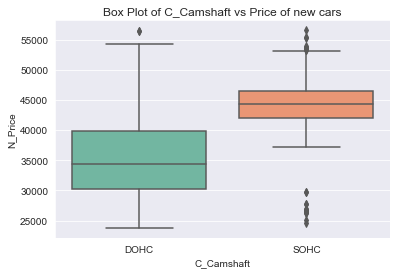

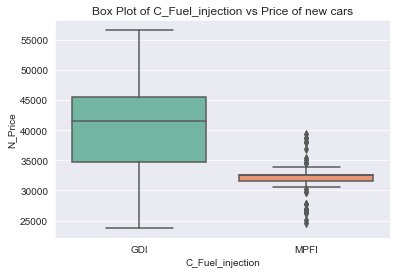

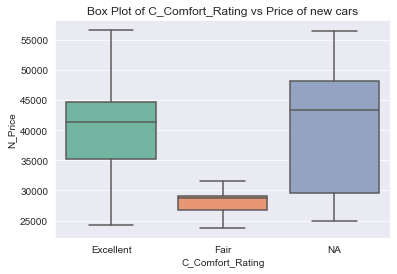

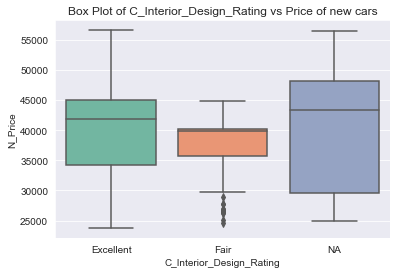

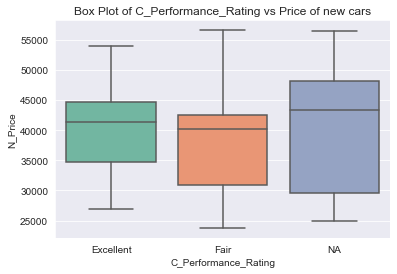

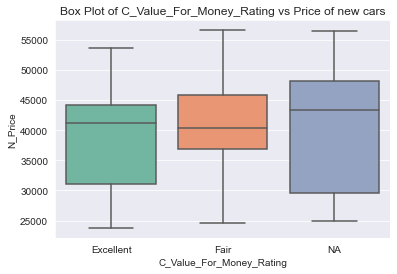

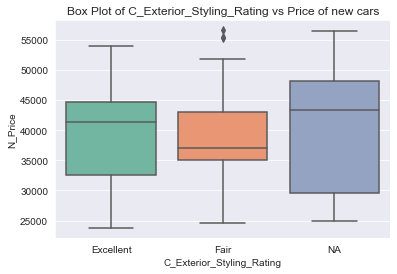

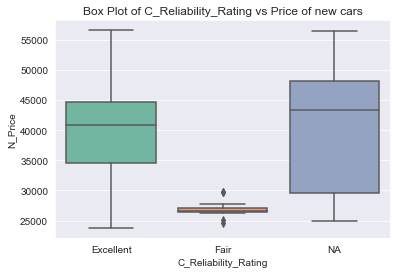

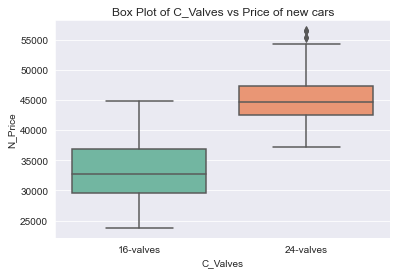

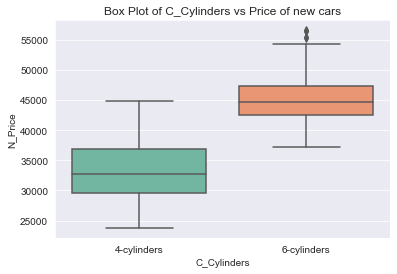

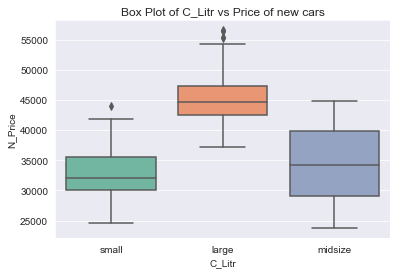

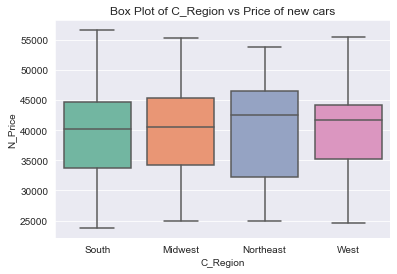

In [210]:
#boxploty pre categorical features, new cars
def plot_boxplots(target, cat_df, cat_cols):
    # Create a boxplot for each categorical column in the cat_cols list
    for col in cat_cols:
        sns.boxplot(x=col, y=target, data=cat_df)
        plt.title(f'Box Plot of {col} vs Price of new cars')
        plt.xlabel(col)
        plt.ylabel('N_Price')
        plt.show()

plot_boxplots(target_new['N_Price'], categorical_features_new, categorical_features_new.columns)

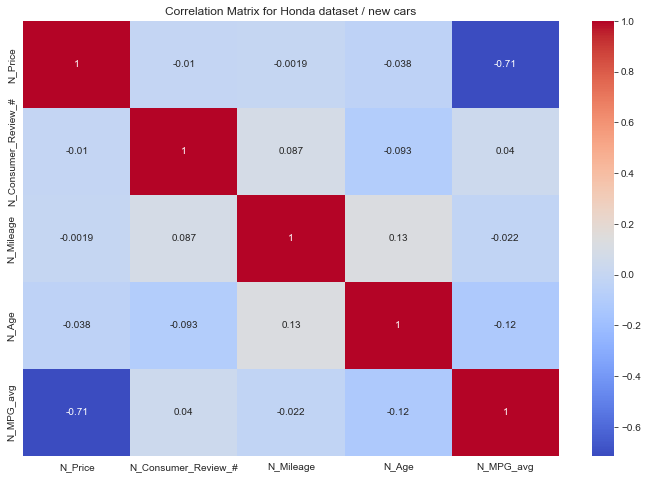

In [211]:
#correlation matrix new cars Price vs. Numerical feat
corr_matrix = df_new.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Honda dataset / new cars')
plt.show()

In [212]:
# Drop columns
df_new = df_new.drop(columns=['N_Consumer_Review_#', 'N_Mileage', 'N_Age', 'C_Region',
                              'C_Condition','C_Consumer_Rating', 'C_Exterior_Color','C_Interior_Design_Rating',
                              'C_Performance_Rating', 'C_Value_For_Money_Rating', 'C_Exterior_Styling_Rating',])

### Charts: Used Cars

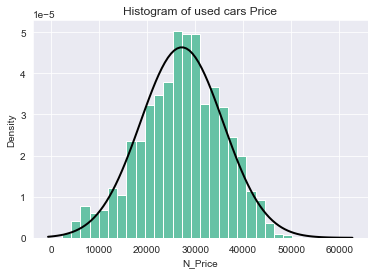

In [213]:
#histogram Price_used
df_used['N_Price'].hist(bins=30, density=True)

# Set the title and labels for the plot
plt.title('Histogram of used cars Price')
plt.xlabel('N_Price')
plt.ylabel('Density')

# Compute the mean and standard deviation of the 'Price' column
mu, std = norm.fit(df_used['N_Price'])

# Create a range of values for the x-axis
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Overlay a normal probability density function (PDF) on the histogram
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Display the plot
plt.show()

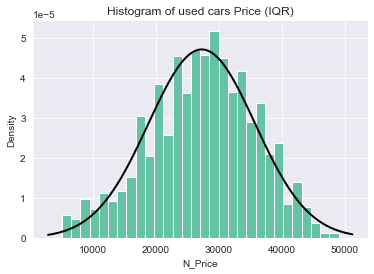

In [214]:
# calculate the first and third quartiles of the 'N_Price' column
q1, q3 = np.percentile(df_used['N_Price'], [25, 75])

# calculate the interquartile range (IQR)
iqr = q3 - q1

# calculate the lower and upper bounds for the IQR range
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# filter the 'N_Price' column to include only values within the IQR range
price_iqr = df_used[(df_used['N_Price'] >= lower_bound) & (df_used['N_Price'] <= upper_bound)]

# create a histogram of the 'price_iqr' data
price_iqr['N_Price'].hist(bins=30, density=True)

# set the title and labels for the plot
plt.title('Histogram of used cars Price (IQR)')
plt.xlabel('N_Price')
plt.ylabel('Density')

# compute the mean and standard deviation of the 'price_iqr' column
mu, std = norm.fit(price_iqr['N_Price'])

# create a range of values for the x-axis
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# overlay a normal probability density function (PDF) on the histogram
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# display the plot
plt.show()

In [215]:
df_used = price_iqr

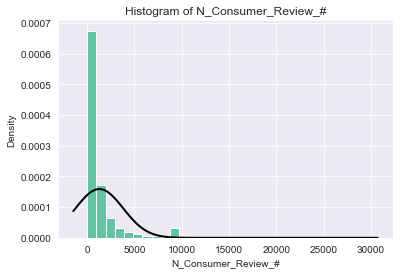

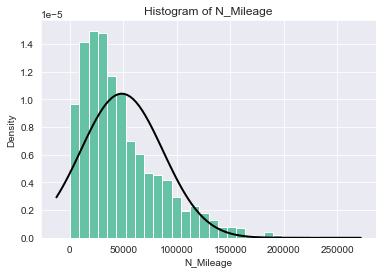

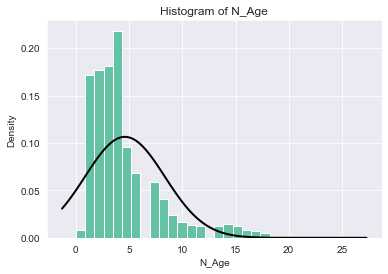

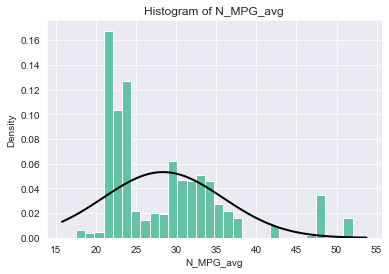

In [216]:
for feature in numerical_features_used.columns:
    # Plot histogram
    numerical_features_used[feature].hist(bins=30, density=True)
    
    # Set the title and labels for the plot
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    
    # Compute the mean and standard deviation of the feature
    mu, std = norm.fit(numerical_features_used[feature].dropna())
    
    # Create a range of values for the x-axis
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    
    # Overlay a normal probability density function (PDF) on the histogram
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    
    # Display the plot
    plt.show()


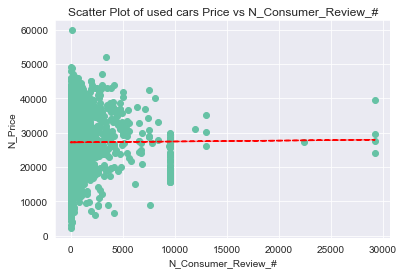

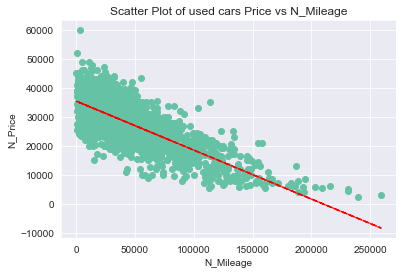

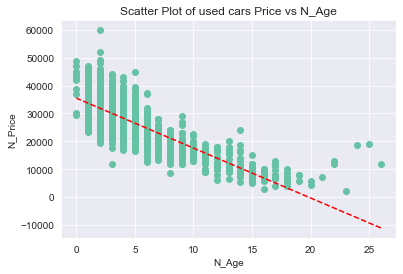

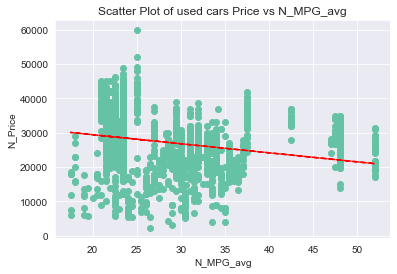

In [217]:
#Scatter ploty pre numerical features, used cars
def plot_scatter(target, num_df):
    # Get the numerical columns of the DataFrame
    num_cols = num_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Create a scatter plot for each numerical column
    for col in num_cols:
        plt.scatter(num_df[col], target)
        plt.title(f'Scatter Plot of used cars Price vs {col}')
        plt.xlabel(col)
        plt.ylabel('N_Price')

        # Add a trendline using numpy.polyfit()
        z = np.polyfit(num_df[col], target, 1)
        p = np.poly1d(z)
        plt.plot(num_df[col],p(num_df[col]),"r--")

        plt.show()

        
plot_scatter(target_used['N_Price'], numerical_features_used)

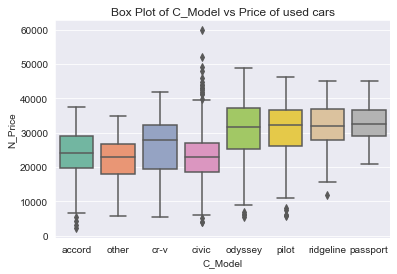

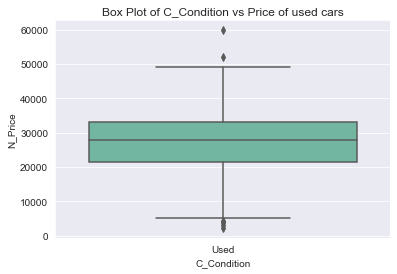

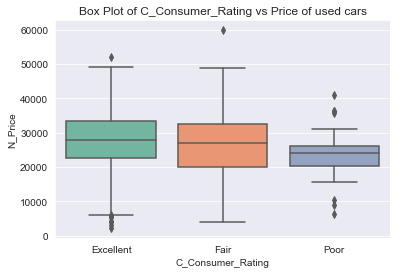

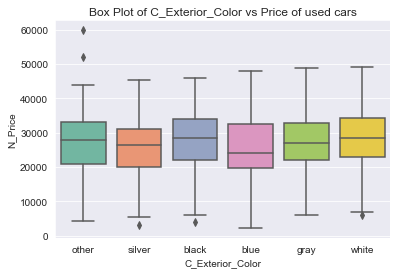

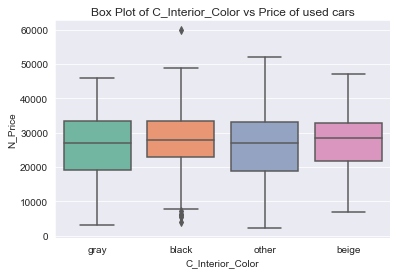

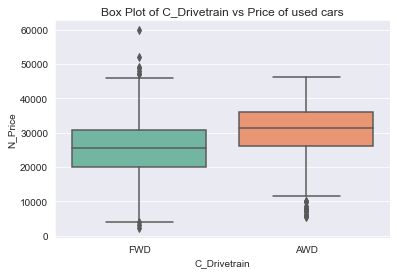

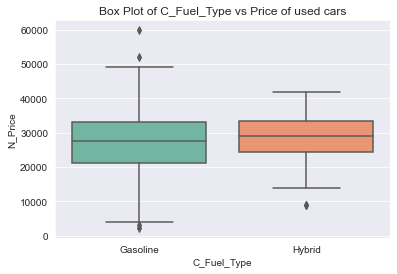

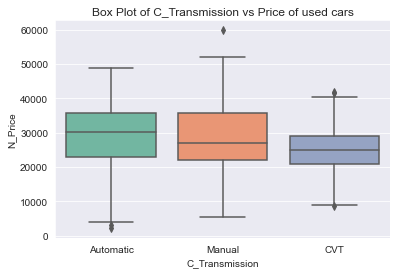

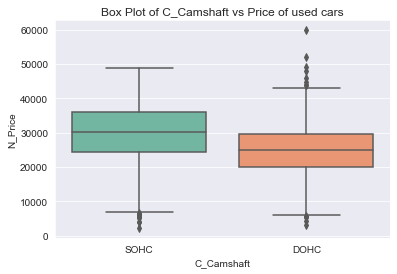

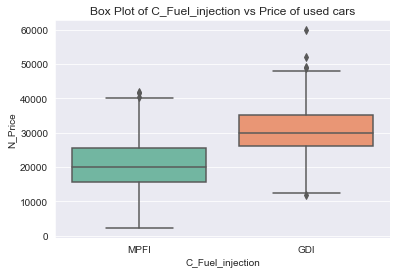

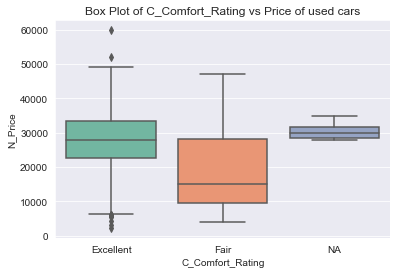

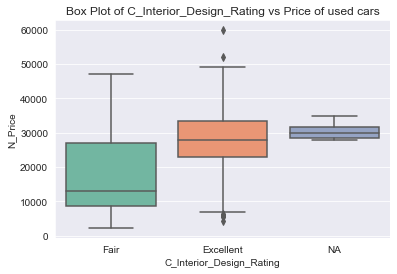

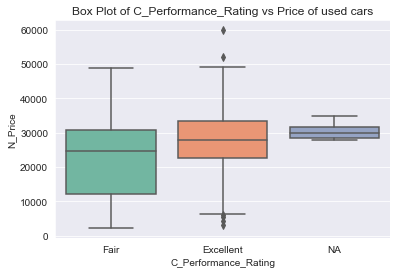

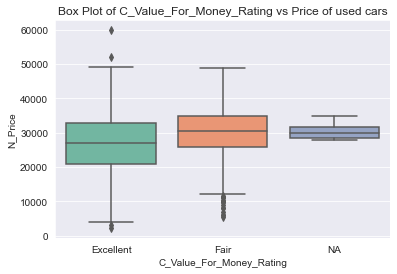

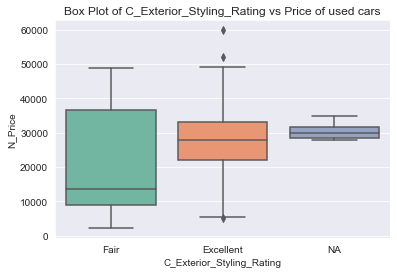

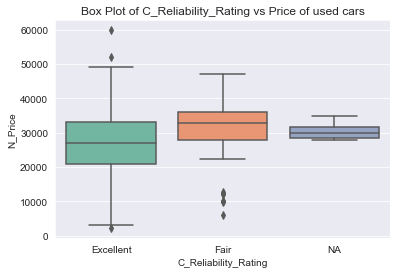

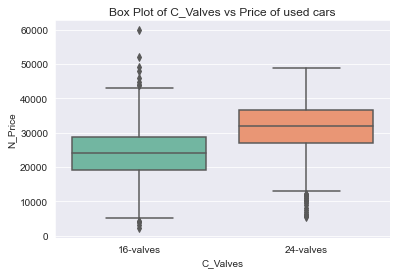

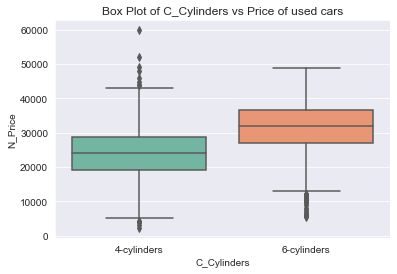

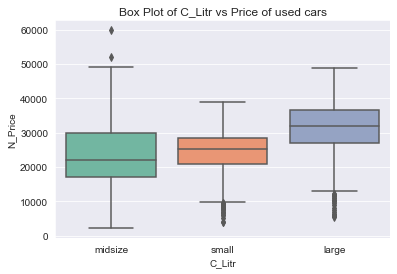

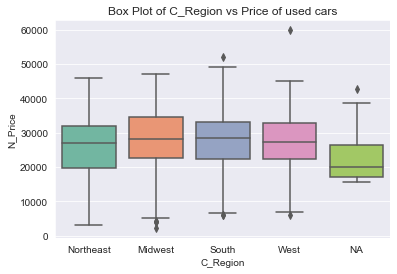

In [218]:
#boxploty pre categorical features, used cars
def plot_boxplots(target, cat_df, cat_cols):
    # Create a boxplot for each categorical column in the cat_cols list
    for col in cat_cols:
        sns.boxplot(x=col, y=target, data=cat_df)
        plt.title(f'Box Plot of {col} vs Price of used cars')
        plt.xlabel(col)
        plt.ylabel('N_Price')
        plt.show()

plot_boxplots(target_used['N_Price'], categorical_features_used, categorical_features_used.columns)

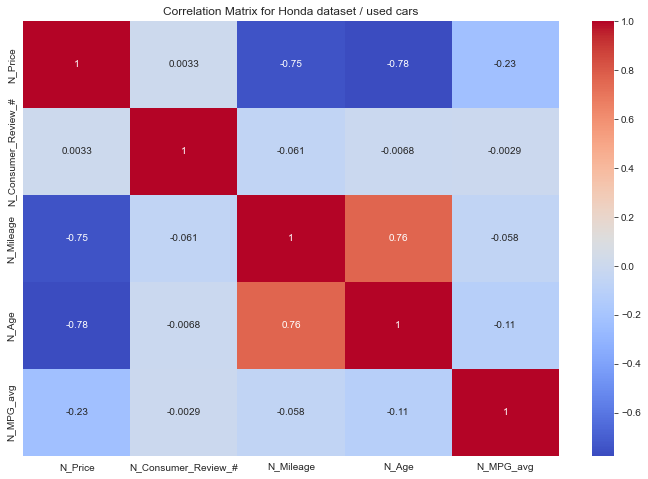

In [219]:
#correlation matrix used cars Price vs. Numerical feat
corr_matrix = df_used.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Honda dataset / used cars')
plt.show()

In [220]:
# Drop columns
df_used = df_used.drop(columns=['N_Consumer_Review_#', 'N_Age', 'C_Region', 'C_Condition',
                                'C_Consumer_Rating', 'C_Exterior_Color', 'C_Interior_Color', 'C_Fuel_Type',
                                'C_Value_For_Money_Rating', 'C_Reliability_Rating', 'C_Region'])

## ML Part: New Cars

In [221]:
# Get dummies
dev_new = pd.get_dummies(df_new)

### Linear Regression

In [222]:
from sklearn.model_selection import train_test_split

X_new = dev_new.drop('N_Price', axis=1)
y_new = dev_new['N_Price']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.2, random_state=42)
print(X_train_new.shape)
print(X_test_new.shape)
print(y_train_new.shape)
print(y_test_new.shape)

(1408, 37)
(352, 37)
(1408,)
(352,)


In [223]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

lin_model.fit(X_train_new, y_train_new)

display(lin_model.intercept_)
display(lin_model.coef_)
display(lin_model.score(X_test_new, y_test_new))

n = len(y_new)
p = X_new.shape[1]
r2 = lin_model.score(X_test_new, y_test_new)
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
display(adj_r2)

display(lin_model.coef_[0])

y_pred_new = lin_model.predict(X_test_new)

46120.42211022109

array([ -231.19358853,  -700.32489084, -1944.87096117,  2591.03671052,
        3231.20360041, -2012.51688531,   -91.55169137, -1437.71880877,
         364.74292652,   709.30495039,    36.49117213,   -20.60119851,
        -725.19492402,  1364.97697776, -1364.97697776, -2193.6355152 ,
        2193.6355152 ,  1498.15518917, -1907.24376743,   409.08857826,
        2482.54560198, -2482.54560198,  -682.30510133,   682.30510133,
        1250.14002187, -1478.55662177,   228.41659991,  -463.35790239,
         234.94130248,   228.41659991, -2066.6760268 ,  2066.6760268 ,
       -2066.6760268 ,  2066.6760268 ,  2066.6760268 , -1667.37853039,
        -399.2974964 ])

0.8384494451039868

0.8349782659337472

-231.19358853037502

### Stepwise Regression

In [224]:
import statsmodels.api as sm

X = dev_new.drop('N_Price', axis=1)
y = dev_new['N_Price']
X = sm.add_constant(X)
x_train_stepwise_new, x_test_stepwise_new, y_train_stepwise_new, y_test_stepwise_new = train_test_split(X, y, test_size = 0.2, random_state=651996)

In [225]:
model_stepwise_new = sm.OLS(y_train_stepwise_new, x_train_stepwise_new)

# Perform stepwise regression
selected_features = list(x_train_stepwise_new.columns)
while True:
    pvalues = model_stepwise_new.fit().pvalues
    feature_with_max_pvalue = pvalues.idxmax()
    model = sm.OLS(y_train_stepwise_new, x_train_stepwise_new)
    max_pvalue = pvalues[feature_with_max_pvalue]
    model = sm.OLS(y_train_stepwise_new, x_train_stepwise_new)
    if max_pvalue > 0.05:
        x_train_stepwise_new = x_train_stepwise_new.drop(feature_with_max_pvalue, axis=1)
        x_test_stepwise_new = x_test_stepwise_new.drop(feature_with_max_pvalue, axis=1)
        selected_features.remove(feature_with_max_pvalue)
        model_stepwise = sm.OLS(y_train_stepwise_new, x_train_stepwise_new)
    else:
        break
    if not selected_features:
        break


In [226]:
results=model_stepwise_new.fit()
display(results.summary())

display(x_test_stepwise_new.shape)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                N_Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     466.2
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        08:44:06   Log-Likelihood:                -13102.
No. Observations:                1408   AIC:                         2.624e+04
Df Residuals:                    1388   BIC:                         2.635e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           8616.3742    552.694     15.590      0.000    7532.169    9700.579
N_MPG_avg                       -353.8089    105.593     -3.351      0.001    -560.947    -146.670
C_Model_cr-v                    3882.5094    423.202      9.174      0.000    3052.325    4712.694
C_Model_odyssey                 4301.1889    400.647     10.736      0.000    3515.249    5087.128
C_Model_passport                1266.3004    372.960      3.395      0.001     534.675    1997.926
C_Model_ridgeline               1439.1123    316.823      4.542      0.000     817.609    2060.615
C_Interior_Color_beige          2798.4374    354.972      7.884      0.000    2102.098    3494.777
C_Interior_Color_black          2099.4279    264.747      7.930      0.000    1580.080    2618.776
C_Interior_Color_gray           1997.7362    301.029      6.636      0.000    1407.215    2588.258
C_Interior_Color_other          1720.7726    593.867      2.898      0.004     555.798    2885.747
C_Drivetrain_AWD                5571.5251    279.926     19.904      0.000    5022.402    6120.648
C_Drivetrain_FWD                3044.8490    331.694      9.180      0.000    2394.173    3695.525
C_Fuel_Type_Gasoline            1953.5992    319.689      6.111      0.000    1326.472    2580.726
C_Fuel_Type_Hybrid              6662.7750    467.732     14.245      0.000    5745.236    7580.314
C_Transmission_Automatic        4435.2896    396.642     11.182      0.000    3657.207    5213.372
C_Transmission_CVT               938.9297    371.688      2.526      0.012     209.798    1668.061
C_Transmission_Manual           3242.1549    523.473      6.194      0.000    2215.271    4269.039
C_Camshaft_DOHC                 7075.0749    317.685     22.271      0.000    6451.880    7698.270
C_Camshaft_SOHC                 1541.2992    412.129      3.740      0.000     732.837    2349.761
C_Fuel_injection_GDI            2906.9190    346.554      8.388      0.000    2227.093    3586.744
C_Fuel_injection_MPFI           5709.4552    810.554      7.044      0.000    4119.412    7299.498
C_Comfort_Rating_Excellent      4568.8255    357.644     12.775      0.000    3867.245    5270.406
C_Comfort_Rating_Fair            807.9973    277.179      2.915      0.004     264.263    1351.732
C_Comfort_Rating_NA             3239.5514    495.650      6.536      0.000    2267.248    4211.855
C_Reliability_Rating_Excellent  2796.2001    816.934      3.423      0.001    1193.642    4398.759
C_Reliability_Rating_Fair       2580.6226    902.158      2.861      0.004     810.883    4350.362
C_Reliability_Rating_NA         3239.5514    495.650      6.536      0.000    2267.248    4211.855
C_Valves_16-valves              2787.2210    448.534      6.214      0.000    1907.343    3667.099
C_Valves_24-va

(352, 34)

### Decesion Tree

In [227]:
from sklearn.tree import DecisionTreeRegressor
X = dev_new.drop('N_Price', axis=1).values
y = dev_new['N_Price'].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=651996)

dt_model_new = DecisionTreeRegressor(random_state=651996)
dt_model_new.fit(x_train, y_train)

DecisionTreeRegressor(random_state=651996)

### Random Forest

In [228]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 2000, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=2000, random_state=42)

In [229]:
display(rf_model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 2000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [230]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

display(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [231]:
from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters, using 3 fold cross validation across 10 different combinations
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=651996, n_jobs = -1)
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=2000,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=651996, verbose=2)

In [232]:
display(rf_random.best_params_)

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [233]:
best_rf_model = rf_random.best_estimator_

### Gradient Boosting

In [234]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=651996)
gb_model.fit(x_train, y_train)

GradientBoostingRegressor(random_state=651996)

In [235]:
gbp_model = GradientBoostingRegressor(n_estimators=3000,
                                      learning_rate=0.05,
                                      max_depth=4,
                                      max_features='sqrt',
                                      min_samples_leaf=15,
                                      min_samples_split=10,
                                      loss='huber',
                                      random_state=651996)

gbp_model.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=651996)

### Model Evaluation

In [236]:
import sklearn.metrics as skm
from sklearn.metrics import r2_score

def evaluate_model(y_test, y_pred_new,x_test):
    print("R2 score =", round(skm.r2_score(y_test, y_pred_new), 4))
    n = len(y_test)
    p = x_test.shape[1]
    skm.r2_score(y_test, y_pred_new)
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    print("R2 adj score =", round(adj_r2, 4))
    print("Mean squared error =", round(skm.mean_squared_error(y_test, y_pred_new), 2))
    print("RMSE =", round((np.sqrt(skm.mean_squared_error(y_test, y_pred_new))), 10))
    print("Mean absolute error =", round(skm.mean_absolute_error(y_test, y_pred_new), 2))
    print("Median absolute error =", round(skm.median_absolute_error(y_test, y_pred_new), 2))

In [237]:
df_evalution = pd.DataFrame(data=np.nan, index=range(7), columns=['Model','RMSE'])

### Evaluation Linear Model

In [238]:
y_pred_new_subset = lin_model.predict(X_test_new)
evaluate_model(y_test_new, y_pred_new_subset,X_test_new)
df_evalution.loc[0,'Model']='Linear Model'
df_evalution.loc[0,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test_new, y_pred_new_subset))), 10)

R2 score = 0.8384
R2 adj score = 0.8194
Mean squared error = 7897652.92
RMSE = 2810.2763063276
Mean absolute error = 2176.08
Median absolute error = 1850.51


### Evaluation Stepwise Model

In [239]:
y_pred_new_stepwise = model_stepwise.fit().predict(x_test_stepwise)
evaluate_model(y_test_stepwise_new, y_pred_new_stepwise,x_test_stepwise)
df_evalution.loc[1,'Model']='Stepwise Linear Model'
df_evalution.loc[1,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test_stepwise_new, y_pred_new_stepwise))), 10)

R2 score = 0.8396
R2 adj score = 0.8211
Mean squared error = 8102120.69
RMSE = 2846.422437051
Mean absolute error = 2141.43
Median absolute error = 1757.28


### Evaluation Decision Tree

In [240]:
y_pred_new = dt_model_new.predict(x_test)
evaluate_model(y_test, y_pred_new,x_test)
df_evalution.loc[2,'Model']='Regression Tree Model'
df_evalution.loc[2,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test, y_pred_new))), 10)

R2 score = 0.8383
R2 adj score = 0.8194
Mean squared error = 8170790.6
RMSE = 2858.4594802844
Mean absolute error = 1907.39
Median absolute error = 1264.83


### Evaluation Random Forest

Without hyper-parameter optimization

In [241]:
y_pred_new = rf_model.predict(x_test)
evaluate_model(y_test, y_pred_new,x_test)
df_evalution.loc[3,'Model']='Random Forest Model'
df_evalution.loc[3,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test, y_pred_new))), 10)

R2 score = 0.8491
R2 adj score = 0.8194
Mean squared error = 7623699.83
RMSE = 2761.1048203585
Mean absolute error = 1889.58
Median absolute error = 1272.39


With hyper-parameter optimization

In [242]:
y_pred_new = best_rf_model.predict(x_test)
evaluate_model(y_test, y_pred_new,x_test)
df_evalution.loc[4,'Model']='Random Forest Model Hyper-Parametr'
df_evalution.loc[4,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test, y_pred_new))), 10)

R2 score = 0.8518
R2 adj score = 0.8194
Mean squared error = 7486802.8
RMSE = 2736.2022593041
Mean absolute error = 1913.21
Median absolute error = 1369.03


### Evaluation Gradient Boosting

In [243]:
y_pred_new = gb_model.predict(x_test)
evaluate_model(y_test, y_pred_new,x_test)
df_evalution.loc[5,'Model']='Gradient Boosting'
df_evalution.loc[5,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test, y_pred_new))), 10)

R2 score = 0.8487
R2 adj score = 0.8194
Mean squared error = 7643589.44
RMSE = 2764.7042224308
Mean absolute error = 1926.29
Median absolute error = 1282.23


In [244]:
y_pred_new = gbp_model.predict(x_test)
evaluate_model(y_test, y_pred_new,x_test)
df_evalution.loc[6,'Model']='Gradient Boosting Hyper-Parametr'
df_evalution.loc[6,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test, y_pred_new))), 10)

R2 score = 0.8483
R2 adj score = 0.8194
Mean squared error = 7661494.43
RMSE = 2767.9404664252
Mean absolute error = 1858.97
Median absolute error = 1166.46


## Comparison

In [245]:
display(df_evalution)

,Model,RMSE
0,Linear Model,2810.276306
1,Stepwise Linear Model,2846.422437
2,Regression Tree Model,2858.459480
3,Random Forest Model,2761.104820
4,Random Forest Model Hyper-Parametr,2736.202259
5,Gradient Boosting,2764.704222
6,Gradient Boosting Hyper-Parametr,2767.940466


In [1]:
## ML Part: Used Cars

In [ ]:
# Get dummies
dev_used = pd.get_dummies(df_used)

In [ ]:
#Linear regression

In [ ]:
from sklearn.model_selection import train_test_split

X_used = dev_used.drop('N_Price', axis=1)
y_used = dev_used['N_Price']

X_train_used, X_test_used, y_train_used, y_test_used = train_test_split(X_used, y_used, test_size = 0.2, random_state=42)
print(X_train_used.shape)
print(X_test_used.shape)
print(y_train_used.shape)
print(y_test_used.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

lin_model.fit(X_train_used, y_train_used)

display(lin_model.intercept_)
display(lin_model.coef_)
display(lin_model.score(X_test_used, y_test_used))

n = len(y_used)
p = X_used.shape[1]
r2 = lin_model.score(X_test_used, y_test_used)
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
display(adj_r2)

display(lin_model.coef_[0])

y_pred_used = lin_model.predict(X_test_used)

In [ ]:
## Stepwise regresion

In [ ]:
import statsmodels.api as sm

X = dev_used.drop('N_Price', axis=1)
y = dev_used['N_Price']
X = sm.add_constant(X)
x_train_stepwise_used, x_test_stepwise_used, y_train_stepwise_used, y_test_stepwise_used = train_test_split(X, y, test_size = 0.2, random_state=651996)

In [ ]:
model_stepwise_used = sm.OLS(y_train_stepwise_used, x_train_stepwise_used)

# Perform stepwise regression
selected_features = list(x_train_stepwise_used.columns)
while True:
    pvalues = model_stepwise_used.fit().pvalues
    feature_with_max_pvalue = pvalues.idxmax()
    model = sm.OLS(y_train_stepwise_used, x_train_stepwise_used)
    max_pvalue = pvalues[feature_with_max_pvalue]
    model = sm.OLS(y_train_stepwise_used, x_train_stepwise_used)
    if max_pvalue > 0.05:
        x_train_stepwise_used = x_train_stepwise_used.drop(feature_with_max_pvalue, axis=1)
        x_test_stepwise_used = x_test_stepwise_used.drop(feature_with_max_pvalue, axis=1)
        selected_features.remove(feature_with_max_pvalue)
        model_stepwise = sm.OLS(y_train_stepwise_used, x_train_stepwise_used)
    else:
        break
    if not selected_features:
        break


In [ ]:
results=model_stepwise_used.fit()
display(results.summary())

display(x_test_stepwise_used.shape)

In [ ]:
## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
X = dev_used.drop('N_Price', axis=1).values
y = dev_used['N_Price'].values
x_train_used, x_test_used, y_train_used, y_test_used = train_test_split(X, y, test_size = 0.2, random_state=651996)

dt_model_used = DecisionTreeRegressor(random_state=651996)
dt_model_used.fit(x_train, y_train)

In [ ]:
## Random forrest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model_used = RandomForestRegressor(n_estimators = 2000, random_state=42)
rf_model_used.fit(x_train_used, y_train_used)

In [ ]:
display(rf_model_used.get_params())

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

display(random_grid)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters, using 3 fold cross validation across 10 different combinations
rf_random_used = RandomizedSearchCV(estimator = rf_model_used, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=651996, n_jobs = -1)
rf_random_used.fit(x_train_used, y_train_used)

In [ ]:
display(rf_random_used.best_params_)

In [ ]:
best_rf_model_used = rf_random_used.best_estimator_

In [ ]:
## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model_used = GradientBoostingRegressor(random_state=651996)
gb_model_used.fit(x_train_used, y_train_used)

In [ ]:
gbp_model_used = GradientBoostingRegressor(n_estimators=3000,
                                      learning_rate=0.05,
                                      max_depth=4,
                                      max_features='sqrt',
                                      min_samples_leaf=15,
                                      min_samples_split=10,
                                      loss='huber',
                                      random_state=651996)

gbp_model_used.fit(x_train_used, y_train_used)

In [ ]:
## Model evaluation used cars

In [ ]:
import sklearn.metrics as skm
from sklearn.metrics import r2_score

def evaluate_model(y_test, y_pred_used,x_test):
    print("R2 score =", round(skm.r2_score(y_test, y_pred_used), 4))
    n = len(y_test)
    p = x_test.shape[1]
    skm.r2_score(y_test, y_pred_used)
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    print("R2 adj score =", round(adj_r2, 4))
    print("Mean squared error =", round(skm.mean_squared_error(y_test, y_pred_used), 2))
    print("RMSE =", round((np.sqrt(skm.mean_squared_error(y_test, y_pred_used))), 10))
    print("Mean absolute error =", round(skm.mean_absolute_error(y_test, y_pred_used), 2))
    print("Median absolute error =", round(skm.median_absolute_error(y_test, y_pred_used), 2))

In [ ]:
df_evalution_used = pd.DataFrame(data=np.nan, index=range(7), columns=['Model','RMSE'])

In [ ]:
## Evaluation Linear model

In [ ]:
y_pred_used_subset = lin_model.predict(X_test_used)
evaluate_model(y_test_used, y_pred_used_subset,X_test_used)
df_evalution_used.loc[0,'Model']='Linear Model'
df_evalution_used.loc[0,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test_used, y_pred_used_subset))), 10)

In [ ]:
## Evaluation Stepwise model

In [ ]:
y_pred_used_stepwise = model_stepwise_used.fit().predict(x_test_stepwise_used)
evaluate_model(y_test_stepwise_used, y_pred_used_stepwise,x_test_stepwise_used)
df_evalution_used.loc[1,'Model']='Stepwise Linear Model'
df_evalution_used.loc[1,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test_stepwise_used, y_pred_used_stepwise))), 10)

In [ ]:
## Evaluation Decision tree

In [ ]:
y_pred_used = dt_model_used.predict(x_test_used)
evaluate_model(y_test_used, y_pred_used,x_test_used)
df_evalution_used.loc[2,'Model']='Regression Tree Model'
df_evalution_used.loc[2,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test_used, y_pred_used))), 10)

In [ ]:
## Evaluation Random forrest

In [ ]:
# without hyper-parameter optimization

In [ ]:
y_pred_used = rf_model_used.predict(x_test_used)
evaluate_model(y_test_used, y_pred_used,x_test_used)
df_evalution_used.loc[3,'Model']='Random Forest Model'
df_evalution_used.loc[3,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test_used, y_pred_used))), 10)

In [ ]:
# with hyper-parameter optimization

In [ ]:
y_pred_used = best_rf_model_used.predict(x_test_used)
evaluate_model(y_test_used, y_pred_used,x_test_used)
df_evalution_used.loc[4,'Model']='Random Forest Model Hyper-Parametr'
df_evalution_used.loc[4,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test_used, y_pred_used))), 10)

In [ ]:
## Evaluation gradient boosting

In [ ]:
y_pred_used = gb_model_used.predict(x_test_used)
evaluate_model(y_used, y_pred_used,x_test_used)
df_evalution_used.loc[5,'Model']='Gradient Boosting'
df_evalution_used.loc[5,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test_used, y_pred_used))), 10)

In [ ]:
y_pred_used = gbp_model_used.predict(x_test_used)
evaluate_model(y_test_used, y_pred_used,x_test_used)
df_evalution_used.loc[6,'Model']='Gradient Boosting Hyper-Parametr'
df_evalution_used.loc[6,'RMSE']=round((np.sqrt(skm.mean_squared_error(y_test_used, y_pred_used))), 10)

In [ ]:
## Comparison

In [ ]:
display(df_evalution_used)